In [107]:
import os 
import pandas as pd
import matplotlib.pyplot as plt

# 'A Lover's Complaint' by Shakespeare

In [108]:
df = pd.read_fwf('shake.txt') #load the text

In [109]:
df

,poem
0,FROM off a hill whose concave womb reworded
1,"A plaintful story from a sistering vale,"
2,"My spirits to attend this double voice accorded,"
3,And down I laid to list the sad-tuned tale;
4,"Ere long espied a fickle maid full pale,"
5,"Tearing of papers, breaking rings a-twain,"
6,Storming her world with sorrow's wind and rain.
7,"Upon her head a platted hive of straw,"
8,"Which fortified her visage from the sun,"
9,Whereon the thought might think sometime it saw


In [110]:
import re
df.poem = df.poem.apply(lambda x: re.sub('[^a-zA-Z]',' ', x))

# clean up
remove characters, change everything to uppercase/lowercase

In [111]:
df.poem

0            FROM off a hill whose concave womb reworded
1               A plaintful story from a sistering vale 
2       My spirits to attend this double voice accorded 
3            And down I laid to list the sad tuned tale 
4               Ere long espied a fickle maid full pale 
5             Tearing of papers  breaking rings a twain 
6        Storming her world with sorrow s wind and rain 
7                 Upon her head a platted hive of straw 
8               Which fortified her visage from the sun 
9        Whereon the thought might think sometime it saw
10                 The carcass of beauty spent and done 
11            Time had not scythed all that youth begun 
12     Nor youth all quit  but  spite of heaven s fel...
13     Some beauty peep d through lattice of sear d age 
14             Oft did she heave her napkin to her eyne 
15                 Which on it had conceited characters 
16            Laundering the silken figures in the brine
17              That season d w

In [112]:
df.poem = df.poem.apply(lambda x: x.lower())

In [113]:
df.poem

0            from off a hill whose concave womb reworded
1               a plaintful story from a sistering vale 
2       my spirits to attend this double voice accorded 
3            and down i laid to list the sad tuned tale 
4               ere long espied a fickle maid full pale 
5             tearing of papers  breaking rings a twain 
6        storming her world with sorrow s wind and rain 
7                 upon her head a platted hive of straw 
8               which fortified her visage from the sun 
9        whereon the thought might think sometime it saw
10                 the carcass of beauty spent and done 
11            time had not scythed all that youth begun 
12     nor youth all quit  but  spite of heaven s fel...
13     some beauty peep d through lattice of sear d age 
14             oft did she heave her napkin to her eyne 
15                 which on it had conceited characters 
16            laundering the silken figures in the brine
17              that season d w

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Using CountVectorizer to find the count of words

In [23]:
cv = CountVectorizer()
import numpy as np

In [24]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(df.poem.values).toarray()
X = pd.DataFrame(X, columns = cv.get_feature_names())

In [51]:
l = list(X.sum(axis = 0, skipna = True))

In [ ]:
colu =[]
for i in X.columns:
    colu.append(i)

# Store the count 
storing it in a dictionary and then sort it from lowest to highest.

In [ ]:
res = {} 
for i in colu: 
    for j in l: 
        res[i] = j 
        l.remove(j) 
        break  

In [ ]:
sorted(res.values())
from operator import itemgetter
sres = sorted(res.items(), key=itemgetter(1))
import collections

sorted_dict = collections.OrderedDict(sres)

# Plot for top 30 words

In [132]:
xl = [i for i in sorted_dict]
yl = [sorted_dict[i] for i in sorted_dict]
x = xl[::-1]
y = yl[::-1]
x = x[:30]
y = y[:30]


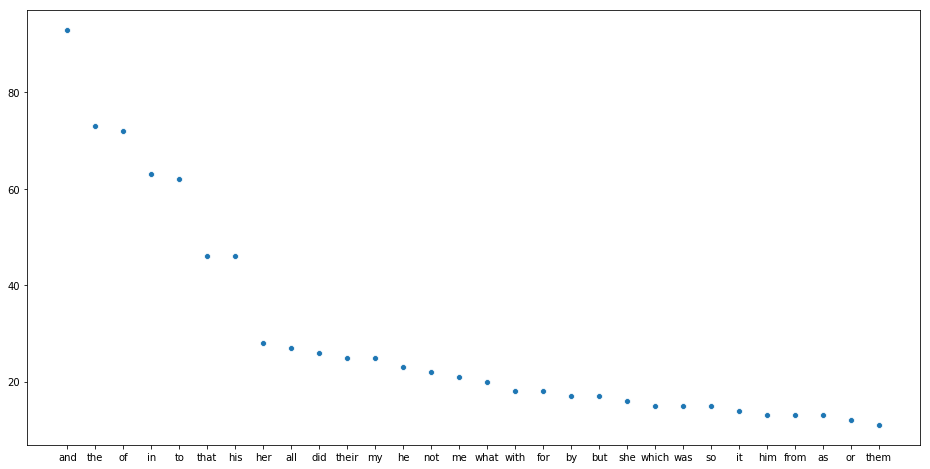

In [93]:
plt.figure(figsize = (16,8))
sns.scatterplot(x=x,y=y)

# Obviously, count is higher for prepositions
So, remove the stopwords.

In [ ]:
import nltk

In [96]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [103]:
from nltk.corpus import stopwords

In [114]:
df.poem = df.poem.apply(lambda x: x.split()) #convert reviews to lists, to identify stopwords
df.poem

0      [from, off, a, hill, whose, concave, womb, rew...
1        [a, plaintful, story, from, a, sistering, vale]
2      [my, spirits, to, attend, this, double, voice,...
3      [and, down, i, laid, to, list, the, sad, tuned...
4       [ere, long, espied, a, fickle, maid, full, pale]
5       [tearing, of, papers, breaking, rings, a, twain]
6      [storming, her, world, with, sorrow, s, wind, ...
7         [upon, her, head, a, platted, hive, of, straw]
8        [which, fortified, her, visage, from, the, sun]
9      [whereon, the, thought, might, think, sometime...
10          [the, carcass, of, beauty, spent, and, done]
11     [time, had, not, scythed, all, that, youth, be...
12     [nor, youth, all, quit, but, spite, of, heaven...
13     [some, beauty, peep, d, through, lattice, of, ...
14     [oft, did, she, heave, her, napkin, to, her, e...
15           [which, on, it, had, conceited, characters]
16     [laundering, the, silken, figures, in, the, br...
17      [that, season, d, woe, 

In [123]:
k = df.poem.apply(lambda x: [word for word in x if word not in set(stopwords.words('english'))])
k

0               [hill, whose, concave, womb, reworded]
1                  [plaintful, story, sistering, vale]
2           [spirits, attend, double, voice, accorded]
3                       [laid, list, sad, tuned, tale]
4        [ere, long, espied, fickle, maid, full, pale]
5            [tearing, papers, breaking, rings, twain]
6                [storming, world, sorrow, wind, rain]
7                   [upon, head, platted, hive, straw]
8                             [fortified, visage, sun]
9      [whereon, thought, might, think, sometime, saw]
10                      [carcass, beauty, spent, done]
11                       [time, scythed, youth, begun]
12            [youth, quit, spite, heaven, fell, rage]
13                  [beauty, peep, lattice, sear, age]
14                          [oft, heave, napkin, eyne]
15                             [conceited, characters]
16                [laundering, silken, figures, brine]
17                      [season, woe, pelleted, tears]
18        

In [124]:
k = k.apply(lambda x: ' '.join(x))
k

0              hill whose concave womb reworded
1                plaintful story sistering vale
2          spirits attend double voice accorded
3                      laid list sad tuned tale
4         ere long espied fickle maid full pale
5           tearing papers breaking rings twain
6               storming world sorrow wind rain
7                  upon head platted hive straw
8                          fortified visage sun
9      whereon thought might think sometime saw
10                    carcass beauty spent done
11                     time scythed youth begun
12            youth quit spite heaven fell rage
13                 beauty peep lattice sear age
14                        oft heave napkin eyne
15                         conceited characters
16              laundering silken figures brine
17                    season woe pelleted tears
18                 often reading contents bears
19            often shrieking undistinguish woe
20                       clamours size h

# Repeat the same procedure

In [125]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(k.values).toarray()
X = pd.DataFrame(X, columns = cv.get_feature_names())
X

,abide,abroad,absence,acceptance,accident,accomplish,accorded,acture,additions,adulterate,...,would,wounded,wrath,ye,yet,yield,yielded,young,youth,youthful
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
lnew = list(X.sum(axis = 0, skipna = True))

In [127]:
cnew =[]
for i in X.columns:
    cnew.append(i)

In [128]:
resnew = {} 
for i in cnew: 
    for j in lnew: 
        resnew[i] = j 
        lnew.remove(j) 
        break  

In [129]:
sorted(resnew.values())
from operator import itemgetter
sres1 = sorted(resnew.items(), key=itemgetter(1))
import collections

sdict = collections.OrderedDict(sres1)

In [130]:
xl = [i for i in sdict]
yl = [sdict[i] for i in sdict]
x = xl[::-1]
y = yl[::-1]
x = x[:30]
y = y[:30]

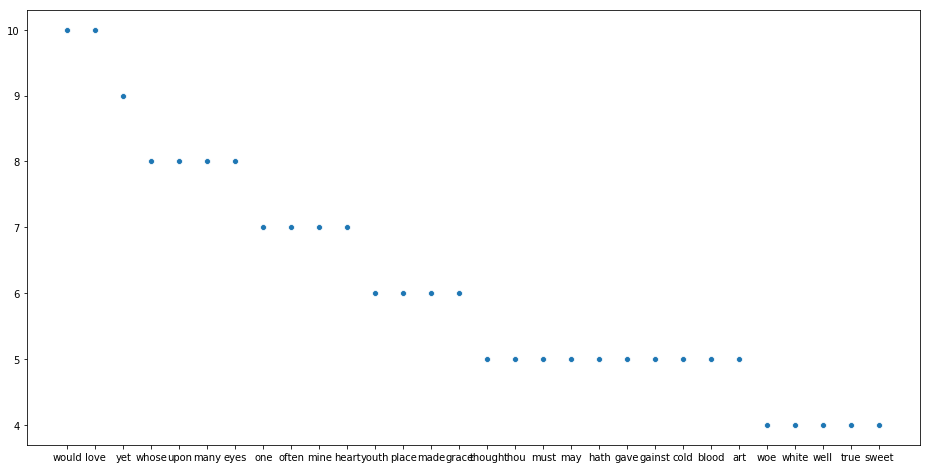

In [131]:
plt.figure(figsize = (16,8))
sns.scatterplot(x=x,y=y)